# Computational Physics Tutorial 4 


## SNGNKO003

### 2. The oscillations of a massive string

For this problem, we are required to solve the spatial part of the differential equation that describes the oscillations of a massive string. The spatial differential equation is given by:

$$\frac{d^2}{dx^2}X(x) + \frac{\omega^2 \rho(x)}{T}X(x) = 0$$

where $\rho(x)$ is the mass density of the string, $T$ the string tension, $\omega$ is the angular frequency.

we need to solve this for two cases. The homogenous $(\rho(x) = 1)$ and the inhomogenous $(\rho(x) = 1.3 - 0.5 \sin\left(\frac{\pi x}{L}\right))$

So we first descritize this system like we did with the previous one.

The discretization of the differential equation can be written as:
$$
\frac{{X_{i+1} - 2X_i + X_{i-1}}}{{h^2}} + \frac{{\omega^2 \rho(x_i)}}{T}X_i = 0
$$
where $X_i = X(x_i)$, $x_i = ih$, $h = \frac{L}{{N-1}}$, $L$ is the length of the string, and $N$ is the number of points.


The eigenvalues of the differential equation can be obtained numerically.

In [2]:
import numpy as np
import scipy.linalg as la

def solve_differential_equation(omega, L, T, num_points, homogeneous=False):
    h = L / (num_points - 1)  # Step size

    # Create the matrix for the finite difference approximation
    matrix_size = num_points
    matrix = np.zeros((matrix_size, matrix_size))
    rhs = np.zeros(matrix_size)

    # Fill the matrix and right-hand side
    for i in range(1, num_points - 1):
        x = i * h
        if homogeneous:
            rho_val = 1.0
        else:
            rho_val = 1.3 - 0.5 * np.sin(np.pi * x / L)
        matrix[i, i] = 2.0 + h**2 * omega**2 * rho_val / T
        matrix[i, i - 1] = -1.0
        matrix[i, i + 1] = -1.0

    # Set the boundary conditions
    matrix[0, 0] = 1.0
    matrix[-1, -1] = 1.0

    # Solve the eigenvalue problem
    eigenvalues, _ = la.eig(matrix)
    eigenvalues = np.sort(eigenvalues.real)  # Sort eigenvalues in ascending order

    return eigenvalues[:10]

# Define the parameters
omega = 1.0  # Frequency
L = 10.0  # Length of the string
T = 1.0  # Tension
num_points = 100

# Determine the first 10 eigenvalues for the given mass density function (1.3 - 0.5*sin(pi*x/L))
eigenvalues_general = solve_differential_equation(omega, L, T, num_points)
print("First 10 eigenvalues (with mass density 1.3 - 0.5*sin(pi*x/L):")
for i, eigenvalue in enumerate(eigenvalues_general):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

# Determine the first 10 eigenvalues for the homogeneous string (mass density 1)
eigenvalues_homogeneous = solve_differential_equation(omega, L, T, num_points, homogeneous=True)
print("First 10 eigenvalues (homogeneous string with mass density 1):")
for i, eigenvalue in enumerate(eigenvalues_homogeneous):
    print(f"Eigenvalue {i+1}: {eigenvalue}")


First 10 eigenvalues (with mass density 1.3 - 0.5*sin(pi*x/L):
Eigenvalue 1: 0.009858291923872248
Eigenvalue 2: 0.01374652640222036
Eigenvalue 3: 0.018994526059714377
Eigenvalue 4: 0.026078184630816306
Eigenvalue 5: 0.035124408370358524
Eigenvalue 6: 0.0461504569520399
Eigenvalue 7: 0.059151046473389327
Eigenvalue 8: 0.07411477625137351
Eigenvalue 9: 0.09102719849730116
Eigenvalue 10: 0.10987155267989307
First 10 eigenvalues (homogeneous string with mass density 1):
Eigenvalue 1: 0.011209955739700477
Eigenvalue 2: 0.01422968756230208
Eigenvalue 3: 0.019259195359902018
Eigenvalue 4: 0.02629341484448004
Eigenvalue 5: 0.03532526315328257
Eigenvalue 6: 0.046345645980657345
Eigenvalue 7: 0.05934346673525657
Eigenvalue 8: 0.07430563771335827
Eigenvalue 9: 0.09121709327707601
Eigenvalue 10: 0.11006080502417996


The above solves the differential equation for both cases and the prints the first 10 eigenvalues $\omega_n$. we can see clearly here that although the eigenvalues differ in both cases, they are no all that different. In fact, we compute the ratio of the these eigen values below to properly see how they compare.

In [3]:
ratio = eigenvalues_homogeneous/eigenvalues_general
print(ratio)

[1.13710933 1.03514787 1.01393398 1.00825327 1.00571838 1.00422941
 1.00325303 1.00257521 1.00208613 1.00172249]


As we can see that the ratio is around one. This confirms that they really aren't that different after all.

We now want to draw the waveforms $X_n(x)$ corresponding to $n = 1,5,9$ . The waveforms are simply the eigenvectors we got when solving the differential equation. The code below does that for us.

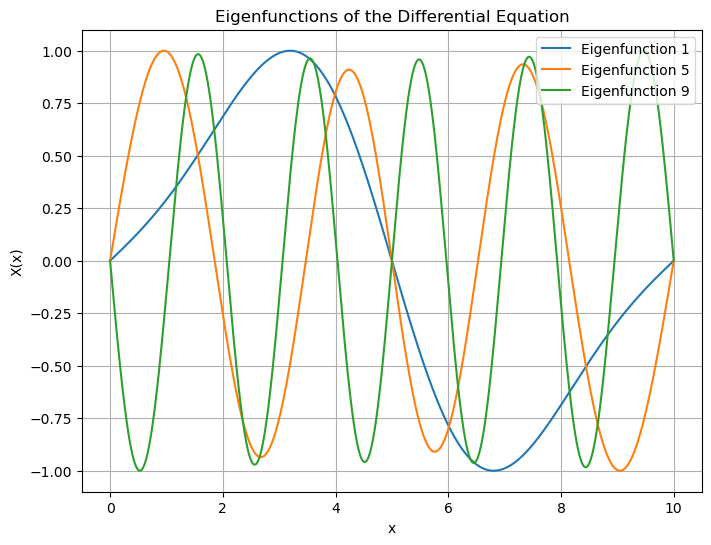

In [6]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def solve_differential_equation(omega, L, T, num_points):
    h = L / (num_points - 1)  # Step size

    # Create the matrix for the finite difference approximation
    matrix_size = num_points
    matrix = np.zeros((matrix_size, matrix_size))
    rhs = np.zeros(matrix_size)

    # Fill the matrix and right-hand side
    for i in range(1, num_points - 1):
        x = i * h
        rho_val = 1.3 - 0.5 * np.sin(np.pi * x / L)
        matrix[i, i] = 2.0 + h**2 * omega**2 * rho_val / T
        matrix[i, i - 1] = -1.0
        matrix[i, i + 1] = -1.0

    # Set the boundary conditions
    matrix[0, 0] = 1.0
    matrix[-1, -1] = 1.0

    # Solve the eigenvalue problem
    eigenvalues, eigenvectors = la.eig(matrix)
    sorted_indices = np.argsort(eigenvalues.real)
    eigenvalues = eigenvalues[sorted_indices].real
    eigenvectors = eigenvectors[:, sorted_indices].real

    return eigenvalues, eigenvectors

# Define the parameters
omega = 2.0  # Frequency
L = 10.0  # Length of the string
T = 1.0  # Tension
num_points = 1000

# Solve the differential equation numerically
eigenvalues, eigenfunctions = solve_differential_equation(omega, L, T, num_points)


# Define the indices of the eigenfunctions to plot
indices = [1, 5, 9]

# Plot the eigenfunctions for n = 1, 5, 9
x_values = np.linspace(0, L, num_points)
plt.figure(figsize=(8, 6))
for index in indices:
    eigenfunction = eigenfunctions[:, index]
    eigenfunction /= np.max(np.abs(eigenfunction))  # Normalize the eigenfunction
    plt.plot(x_values, eigenfunction, label=f"Eigenfunction {index}")

plt.xlabel('x(m)')
plt.ylabel('X(x)')
plt.title('Eigenfunctions of the Differential Equation')
plt.legend()
plt.grid(True)
plt.show()

The above waveforms are the 3 waveforms we are required to plot. As we can see that all the boundary conditions are satisfied. 

$$X(x=0) = X(x=L) = 0$$

We can also see that these waveforms increase in angular frequency as we approach higher modes of the solution. This is indeed what we expect to see especially since we can see that it squared with every term.